In [29]:
%run ..\Functions.ipynb

# Load data

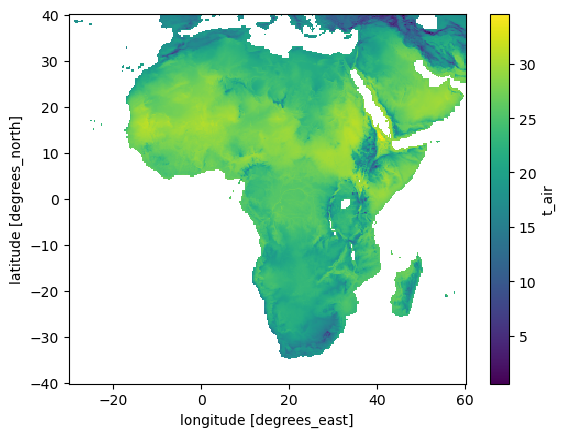

In [2]:
nc0= r"E:\WaPORQA\AgERA5\Processed\Yearly\ERA5_Grid\2018-2022.nc"
ds0 = xr.open_dataset(nc0)
da0 = ds0.t_air.mean(dim='time')
da0.plot() #to use as mask

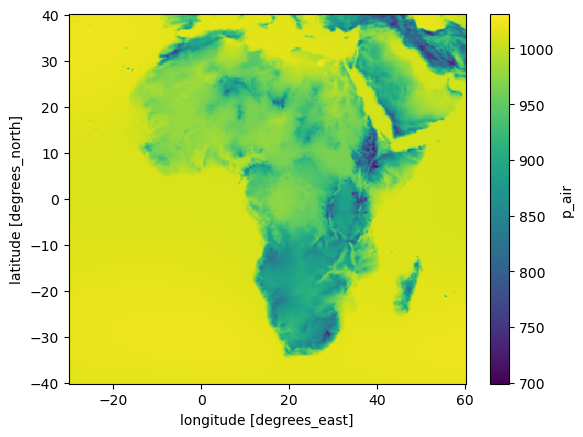

In [3]:
nc1= r"E:\WaPORQA\ERA5\Processed\Yearly\2018-2022.nc"
ds1 = xr.open_dataset(nc1)
da1 = ds1.p_air.mean(dim='time')
da1.plot()

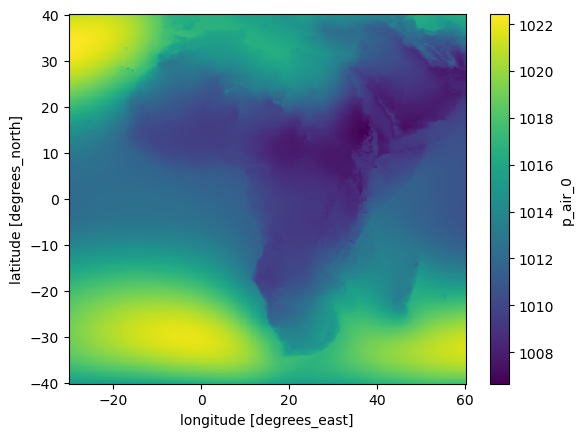

In [4]:
nc2= r"E:\WaPORQA\GEOS5\Processed\Yearly\ERA5_Grid\2018-2022.nc"
ds2 = xr.open_dataset(nc2)
da2 = ds2.p_air_0.mean(dim='time')
da2.plot()

# Graphs matrix

## Sea level pressure

In [5]:
da1 = ds1.p_air_0.mean(dim='time')
da2 = ds2.p_air_0.mean(dim='time')

# masked
da1=da1.where(~da0.isnull(), np.nan)
da2=da2.where(~da0.isnull(), np.nan)

# calculate difference
diff1_2=da1-da2

## Read 2D array as 1D
values1 = np.reshape(da1.values,-1) #reshape 2D to 1D array
values2 = np.reshape(da2.values,-1) #reshape 2D to 1D array

x1=values1[~np.isnan(values1) & ~np.isnan(values2)]
x2=values2[~np.isnan(values1) & ~np.isnan(values2)]


## get min and max for image plot
vmin=float(min(da1.min(),da2.min()))
vmax=float(max(da1.max(),da2.max()))
difmin=float(diff1_2.min())
difmax=float(diff1_2.max())
diflim = max(abs(difmin),abs(difmax))

C:\Users\ntr002\AppData\Local\Temp\ipykernel_11392\1340460983.py:13: RankWarning: Polyfit may be poorly conditioned
  _,z=subplot_density_scatter(x1,x2, ax=lotriang_axs[0],nmax=30,


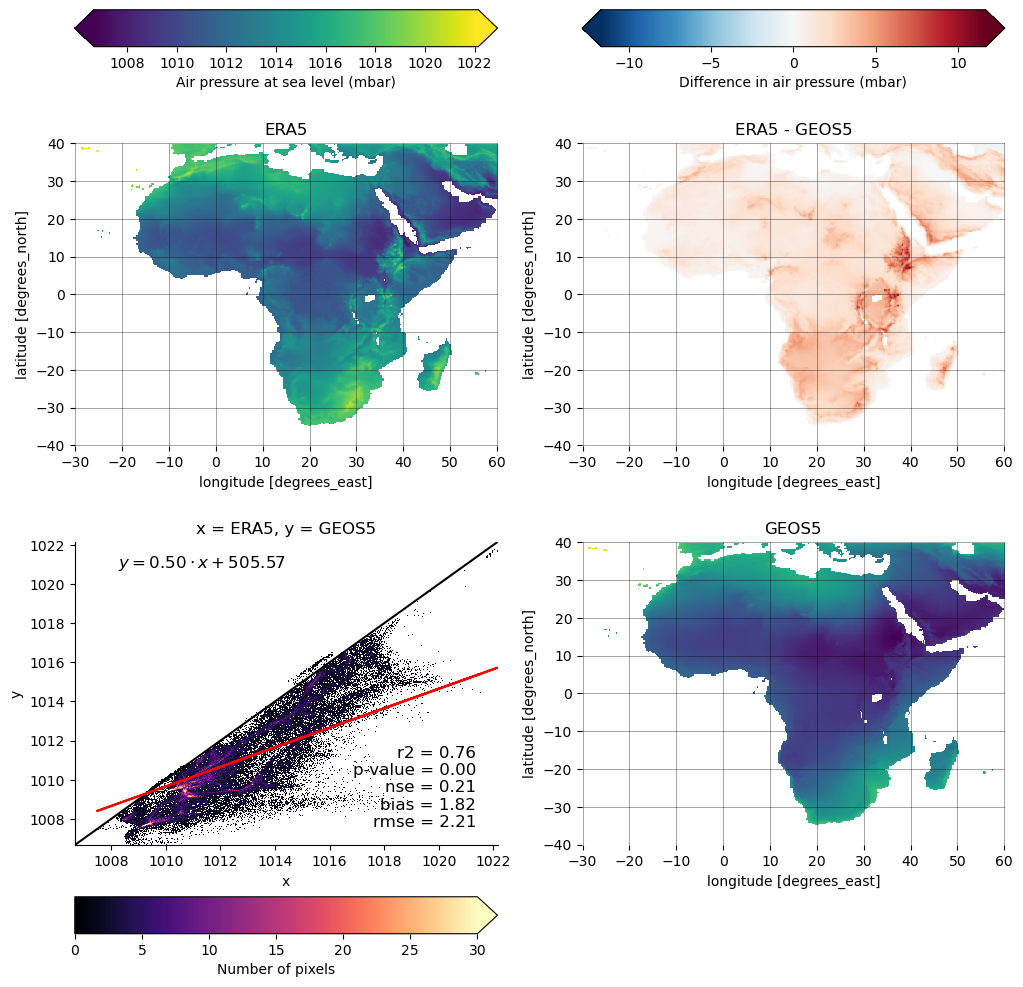

In [30]:
## Plot
### average maps
fig,diagon_axs,uptriang_axs,lotriang_axs,legends_axs = create_graph_matrix_2(figsize = [12,12])
im = subplot_image(da1, ax=diagon_axs[0], title='ERA5', vmin=vmin, vmax=vmax)
subplot_image(da2, ax=diagon_axs[1], title='GEOS5', vmin=vmin, vmax=vmax)
subplot_image_cbar(im, legends_axs[0], fig, label='Air pressure at sea level (mbar)')
### difference maps
im2 = subplot_image(diff1_2, ax=uptriang_axs[0], title='ERA5 - GEOS5',
                    cmap='RdBu_r',
                    vmin=-diflim, vmax=diflim)
subplot_image_cbar(im2, legends_axs[1], fig, label='Difference in air pressure (mbar)')
### scatter plots
_,z=subplot_density_scatter(x1,x2, ax=lotriang_axs[0],nmax=30, 
                            spines_opt=None,
                            title='x = ERA5, y = GEOS5',
                             axlim=(vmin,vmax)
                           )
subplot_scatter_cbar(z, legends_axs[2], fig, 'Number of pixels')

plt.savefig('./figures/graphs_matrix_p0_2018-2022.png',bbox_inches='tight')
plt.show()

In [7]:
diff1_2.mean()

<xarray.DataArray 'p_air_0' ()>
array(1.82301108)

In [8]:
xr.corr(da1,da2)

<xarray.DataArray 'p_air_0' ()>
array(0.87418859)

In [9]:
np.corrcoef(x1,x2)

array([[1.        , 0.87426599],
       [0.87426599, 1.        ]])

## surface air pressure

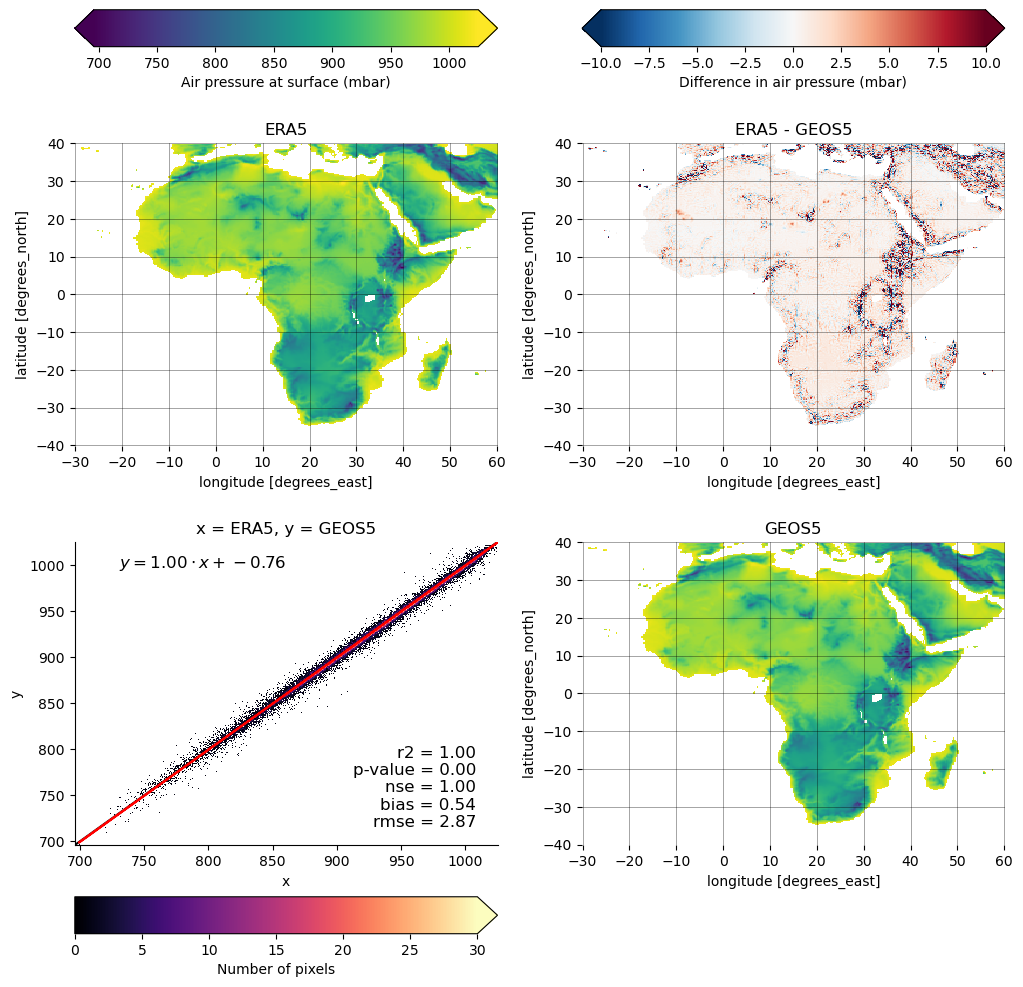

In [31]:
da1 = ds1.p_air.mean(dim='time')
da2 = ds2.p_air.mean(dim='time')
# masked
da1=da1.where(~da0.isnull(), np.nan)
da2=da2.where(~da0.isnull(), np.nan)

# calculate difference
diff1_2=da1-da2

## Read 2D array as 1D
values1 = np.reshape(da1.values,-1) #reshape 2D to 1D array
values2 = np.reshape(da2.values,-1) #reshape 2D to 1D array

x1=values1[~np.isnan(values1) & ~np.isnan(values2)]
x2=values2[~np.isnan(values1) & ~np.isnan(values2)]


## get min and max for image plot
vmin=float(min(da1.min(),da2.min()))
vmax=float(max(da1.max(),da2.max()))
difmin=float(diff1_2.min())
difmax=float(diff1_2.max())
diflim = max(abs(difmin),abs(difmax))

## Plot
### average maps
fig,diagon_axs,uptriang_axs,lotriang_axs,legends_axs = create_graph_matrix_2(figsize = [12,12])
im = subplot_image(da1, ax=diagon_axs[0], title='ERA5', vmin=vmin, vmax=vmax)
subplot_image(da2, ax=diagon_axs[1], title='GEOS5', vmin=vmin, vmax=vmax)
subplot_image_cbar(im, legends_axs[0], fig, label='Air pressure at surface (mbar)')
### difference maps
im2 = subplot_image(diff1_2, ax=uptriang_axs[0], title='ERA5 - GEOS5',cmap='RdBu_r',
                    vmin=-10, vmax=10,
                    # vmin=-diflim, vmax=diflim
                   )
subplot_image_cbar(im2, legends_axs[1], fig, label='Difference in air pressure (mbar)')
### scatter plots
_,z=subplot_density_scatter(x1,x2, ax=lotriang_axs[0],nmax=30, 
                            spines_opt=None,
                            title='x = ERA5, y = GEOS5',
                             axlim=(vmin,vmax)
                           )
subplot_scatter_cbar(z, legends_axs[2], fig, 'Number of pixels')

plt.savefig('./figures/graphs_matrix_p_2018-2022.png',bbox_inches='tight')
plt.show()

In [11]:
diff1_2.mean(skipna=True)

<xarray.DataArray 'p_air' ()>
array(0.54039976)

In [12]:
xr.corr(da1,da2)

<xarray.DataArray 'p_air' ()>
array(0.99842546)

# Hovmoller

In [21]:
folder=r"E:\WaPORQA\AgERA5\Processed\Monthly\ERA5_Grid"
fhs = glob.glob(os.path.join(folder,"*.nc"))
ds=xr.open_mfdataset(fhs)  
da1 = ds.t_air

folder=r"E:\WaPORQA\ERA5\Processed\Monthly"
fhs = glob.glob(os.path.join(folder,"*.nc"))
ds=xr.open_mfdataset(fhs)  
da2 = ds.p_air

folder=r"E:\WaPORQA\GEOS5\Processed\Monthly\ERA5_Grid"
fhs = glob.glob(os.path.join(folder,"*.nc"))
ds=xr.open_mfdataset(fhs)  
da3 = ds.p_air

da2=da2.where(~da1.isnull(), np.nan)
da3=da3.where(~da1.isnull(), np.nan)

# diff1_2=(da1-da2)
# diff1_3=(da1-da3)
diff_p_air=(da2-da3)

# diff1_2.compute()
# diff1_3.compute()
diff_p_air.compute()

<xarray.DataArray 'p_air' (time: 60, latitude: 321, longitude: 361)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ..., -0.49943848,
         -0.54638672,         nan],
        [        nan,         nan,         nan, ..., -0.4652832 ,
          0.15638428,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ..., -0.69493408,
         -0.73037109,         nan],
        [        nan,         nan,         nan, ..., -0.66951904,
         -0.03886719,         nan],
...
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ..., -0.4973999 ,
         -0.56580811, -0.46057129],
        [        nan,         nan,         nan, ..., -0.48236084,
          0.14158936, -0.43133545],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]])
Coordinates:
  * longitude  (longitude) float32 -30.0 -29.75 -29.5 -29.25 ... 59.5 59.75 60.0
  * latitude   (latitude) float32 40.0 39.75 39.5 39.25 ... -39.5 -39.75 -40.0
  * time       (time) datetime64[ns] 2018-01-31 2018-02-28 ... 2022-12-31
    lat        (latitude) float32 40.0 39.75 39.5 39.25 ... -39.5 -39.75 -40.0
    lon        (longitude) float32 -30.0 -29.75 -29.5 -29.25 ... 59.5 59.75 60.0

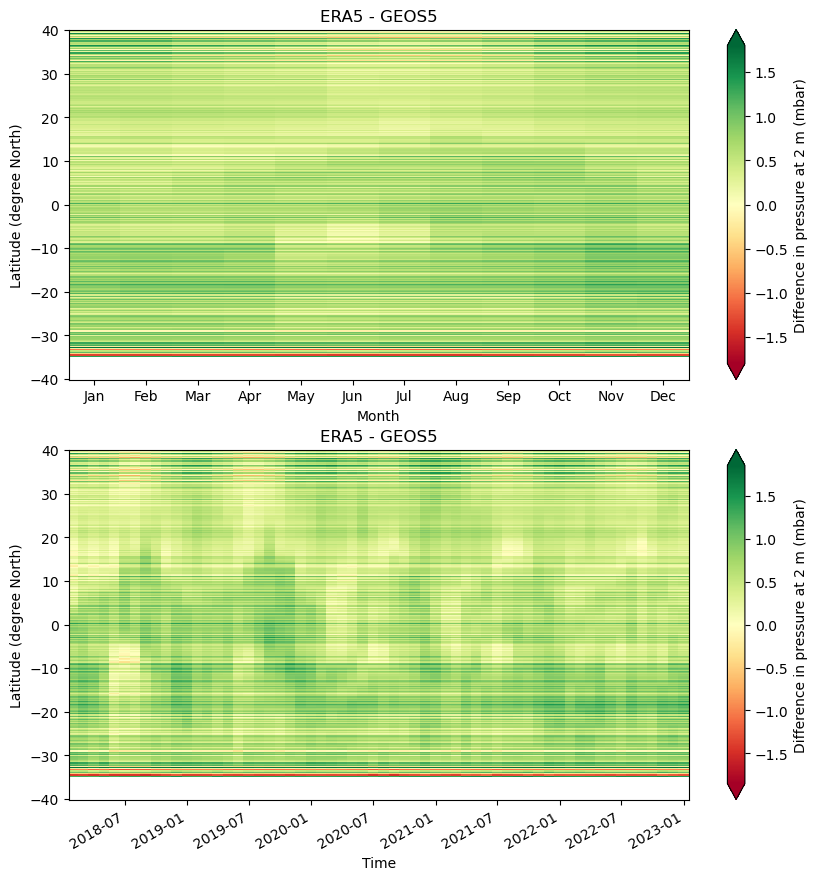

In [9]:
fig, axs = plt.subplots(2,1,figsize=(10, 10))
plot_hovmoller_month(diff_p_air, title = 'ERA5 - GEOS5', ax= axs[0],
               varname="Difference in pressure at 2 m (mbar)",
               dimension=['longitude','latitude'],)
                # vmin=-2,vmax=2)
plot_hovmoller(diff_p_air, title = 'ERA5 - GEOS5', ax= axs[1],
               varname="Difference in pressure at 2 m (mbar)",
               dimension=['longitude','latitude'],)
                # vmin=-2,vmax=2)
plt.savefig('./figures/hovmoller_p_air_2_2018-2022.png',bbox_inches='tight')
plt.show()

In [22]:
folder=r"E:\WaPORQA\AgERA5\Processed\Monthly\ERA5_Grid"
fhs = glob.glob(os.path.join(folder,"*.nc"))
ds=xr.open_mfdataset(fhs)  
da1 = ds.t_air

folder=r"E:\WaPORQA\ERA5\Processed\Monthly"
fhs = glob.glob(os.path.join(folder,"*.nc"))
ds=xr.open_mfdataset(fhs)  
da2 = ds.p_air_0

folder=r"E:\WaPORQA\GEOS5\Processed\Monthly\ERA5_Grid"
fhs = glob.glob(os.path.join(folder,"*.nc"))
ds=xr.open_mfdataset(fhs)  
da3 = ds.p_air_0

da2=da2.where(~da1.isnull(), np.nan)
da3=da3.where(~da1.isnull(), np.nan)

# diff1_2=(da1-da2)
# diff1_3=(da1-da3)
diff_p_air_0=(da2-da3)

# diff1_2.compute()
# diff1_3.compute()
diff_p_air_0.compute()

<xarray.DataArray 'p_air_0' (time: 60, latitude: 321, longitude: 361)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ..., -0.202771  ,
         -0.13798828,         nan],
        [        nan,         nan,         nan, ..., -0.20061035,
         -0.18190918,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ..., -0.44655762,
         -0.38259277,         nan],
        [        nan,         nan,         nan, ..., -0.45216064,
         -0.42524414,         nan],
...
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ..., -0.10576172,
         -0.05942383, -0.01708984],
        [        nan,         nan,         nan, ..., -0.14665527,
         -0.13664551, -0.15966797],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]])
Coordinates:
  * longitude  (longitude) float32 -30.0 -29.75 -29.5 -29.25 ... 59.5 59.75 60.0
  * latitude   (latitude) float32 40.0 39.75 39.5 39.25 ... -39.5 -39.75 -40.0
  * time       (time) datetime64[ns] 2018-01-31 2018-02-28 ... 2022-12-31
    lat        (latitude) float32 40.0 39.75 39.5 39.25 ... -39.5 -39.75 -40.0
    lon        (longitude) float32 -30.0 -29.75 -29.5 -29.25 ... 59.5 59.75 60.0

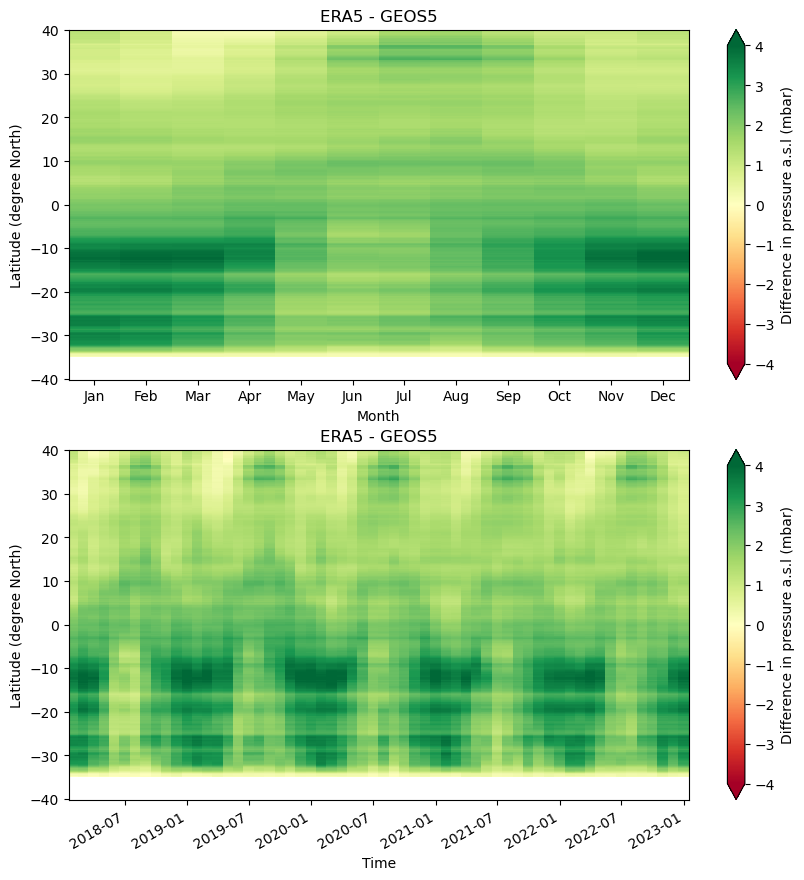

In [18]:
fig, axs = plt.subplots(2,1,figsize=(10, 10))
plot_hovmoller_month(diff_p_air_0, title = 'ERA5 - GEOS5', ax= axs[0],
               varname="Difference in pressure a.s.l (mbar)",
               dimension=['longitude','latitude'],
                vmin=-4,vmax=4
                    )
plot_hovmoller(diff_p_air_0, title = 'ERA5 - GEOS5', ax= axs[1],
               varname="Difference in pressure a.s.l (mbar)",
               dimension=['longitude','latitude'],
                vmin=-4,vmax=4
              )
plt.savefig('./figures/hovmoller_p_air_0_2018-2022.png',bbox_inches='tight')
plt.show()

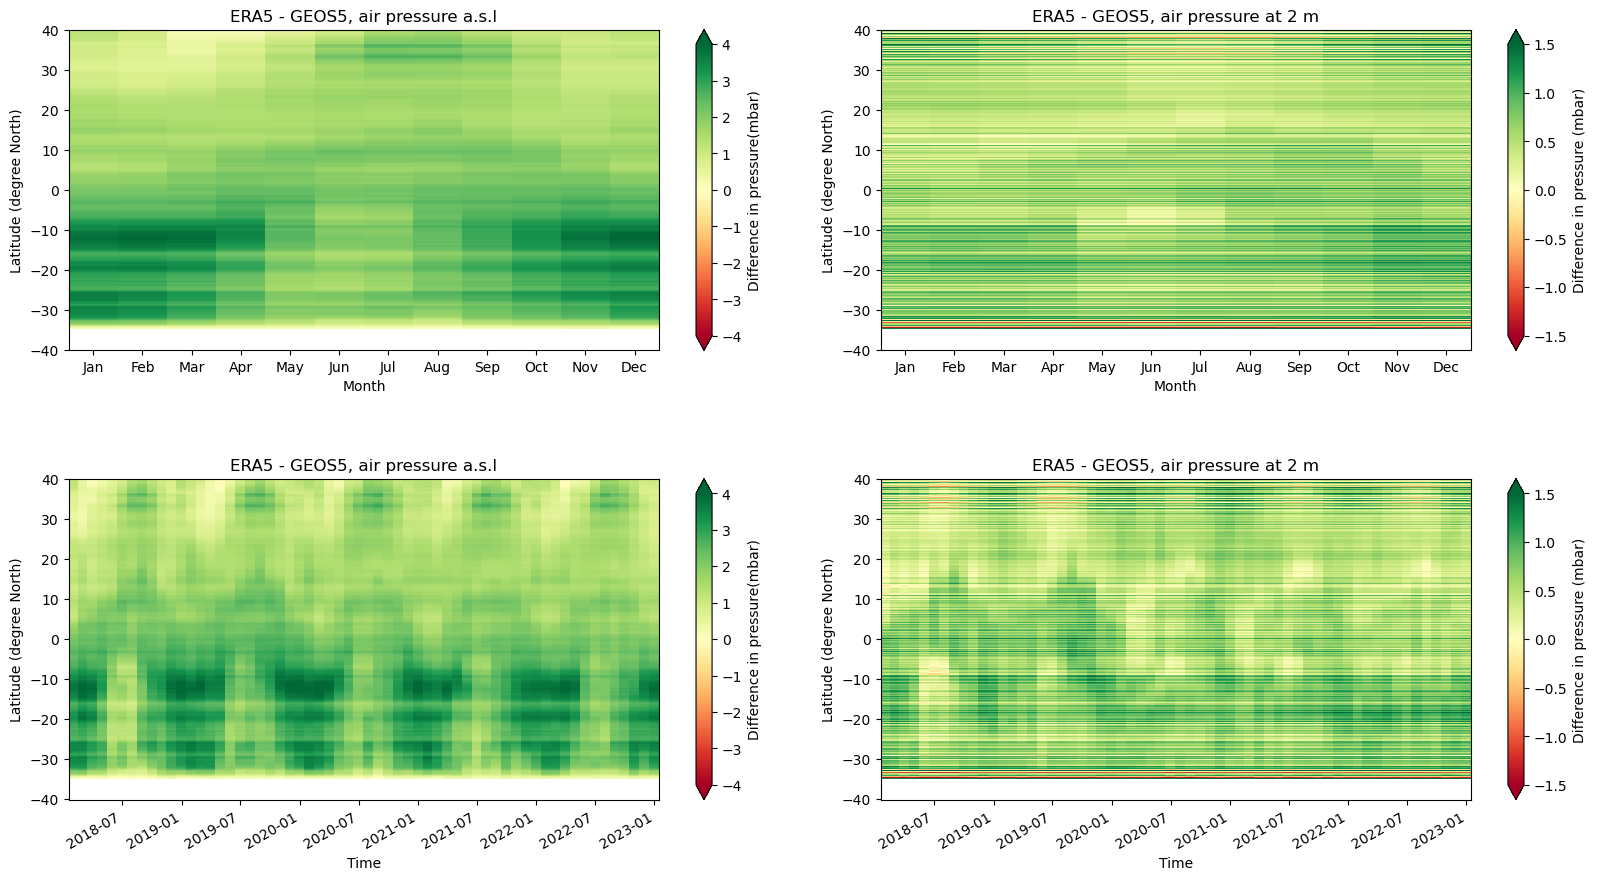

In [25]:
fig, axs = plt.subplots(2,2,figsize=(20, 10))
plt.subplots_adjust(wspace=0.1, hspace=0.4)
plot_hovmoller_month(diff_p_air_0, title = 'ERA5 - GEOS5, air pressure a.s.l', ax= axs[0,0],
               varname="Difference in pressure(mbar)",
               dimension=['longitude','latitude'],
                vmin=-4,vmax=4
                    )
plot_hovmoller(diff_p_air_0, title = 'ERA5 - GEOS5, air pressure a.s.l', ax= axs[1,0],
               varname="Difference in pressure(mbar)",
               dimension=['longitude','latitude'],
                vmin=-4,vmax=4
              )
plot_hovmoller_month(diff_p_air, title = 'ERA5 - GEOS5, air pressure at 2 m', ax= axs[0,1],
               varname="Difference in pressure (mbar)",
               dimension=['longitude','latitude'],
                vmin=-1.5,vmax=1.5
                    )
plot_hovmoller(diff_p_air, title = 'ERA5 - GEOS5, air pressure at 2 m', ax= axs[1,1],
               varname="Difference in pressure (mbar)",
               dimension=['longitude','latitude'],
                vmin=-1.5,vmax=1.5
              )
plt.savefig('./figures/hovmoller_both_p_2018-2022.png',bbox_inches='tight')
plt.show()